### Realizar el EDA, cada paso debe contener la interpretación de los resultados.


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd 
import sweetviz as sv 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.stats import norm 

In [6]:
data = pd.read_csv('Hotel Reservations.csv')

In [7]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [9]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


                                             |          | [  0%]   00:00 -> (? left)


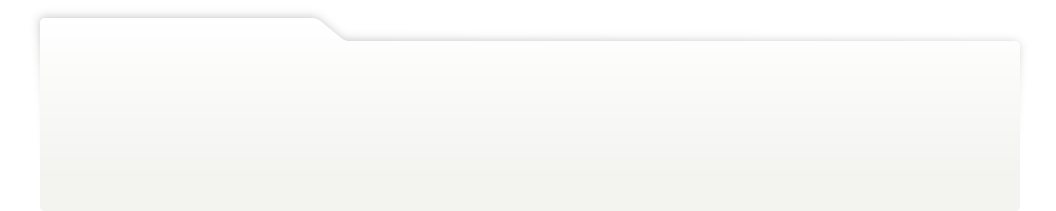
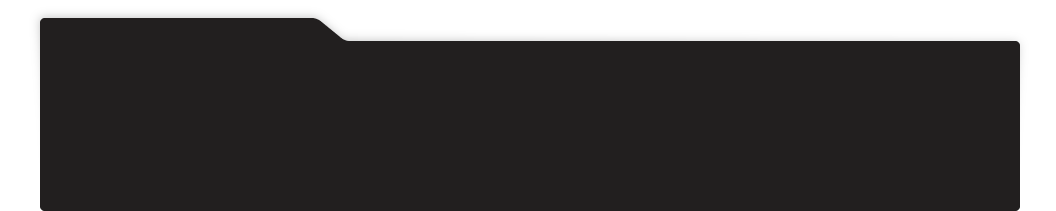
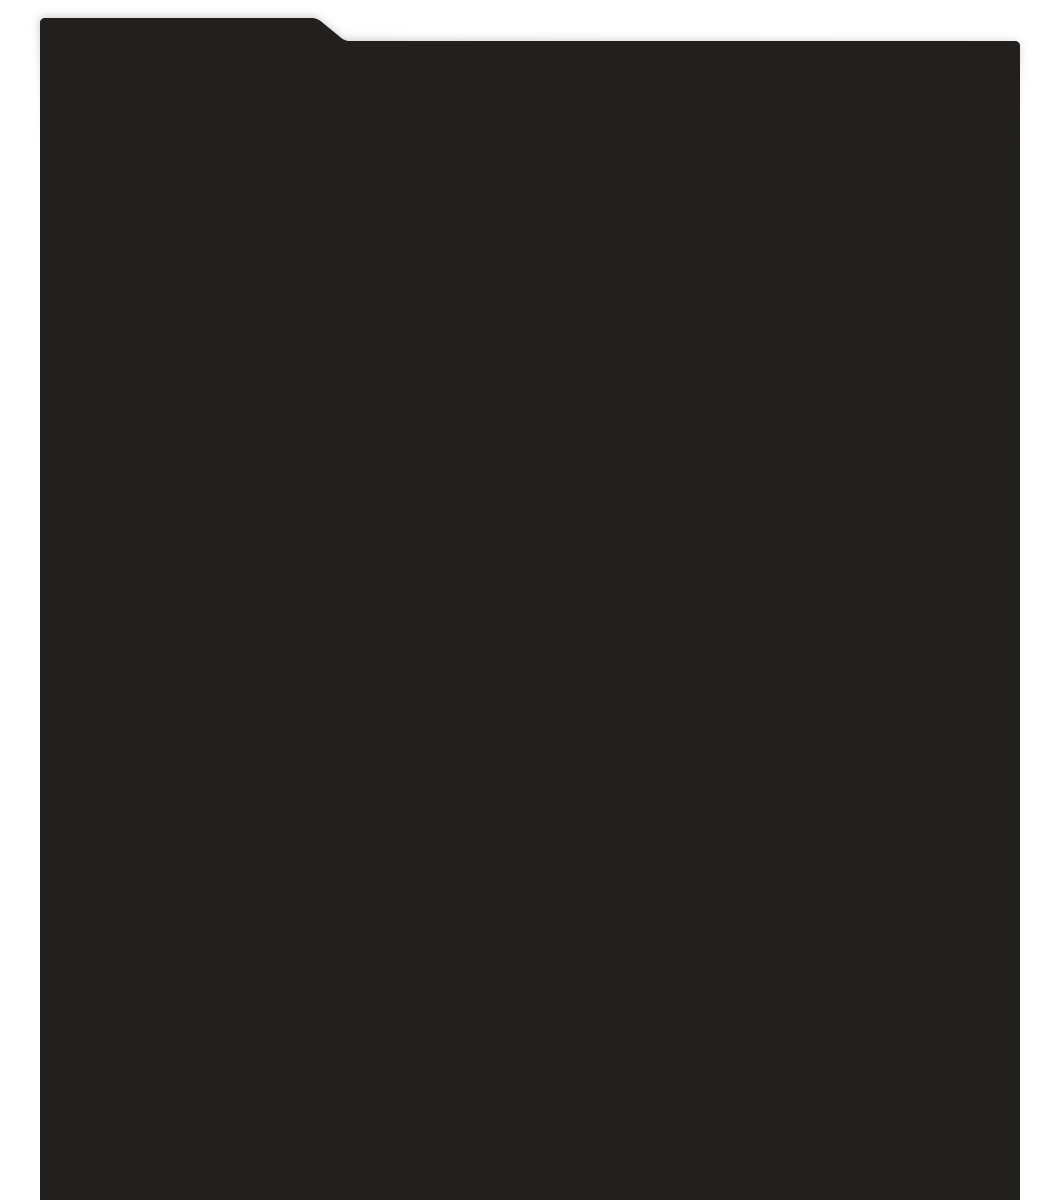
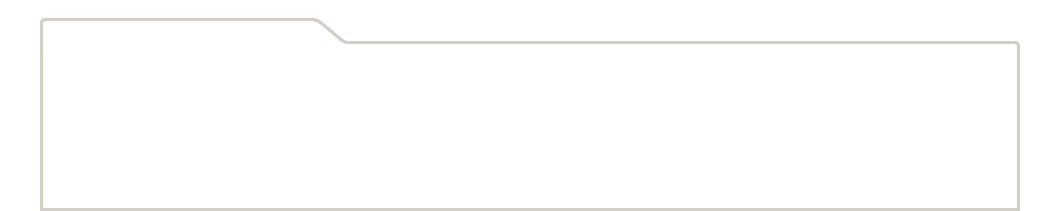
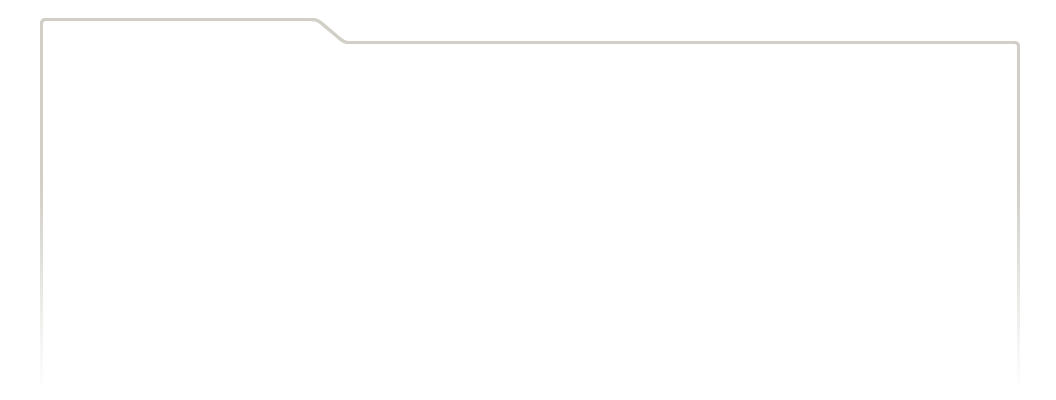
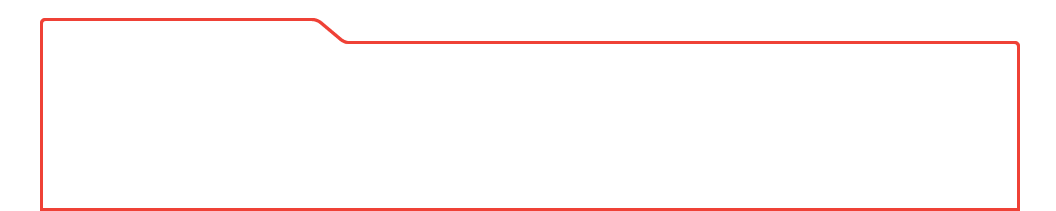
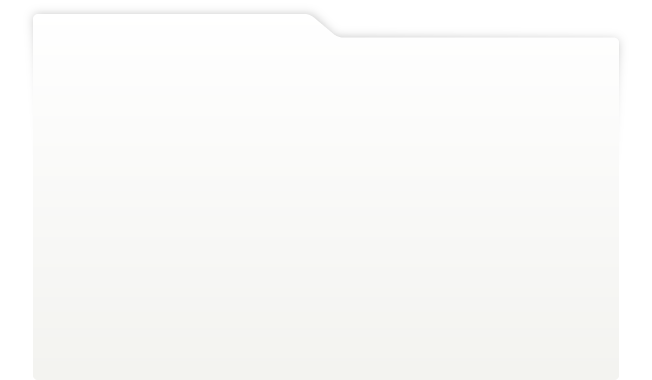
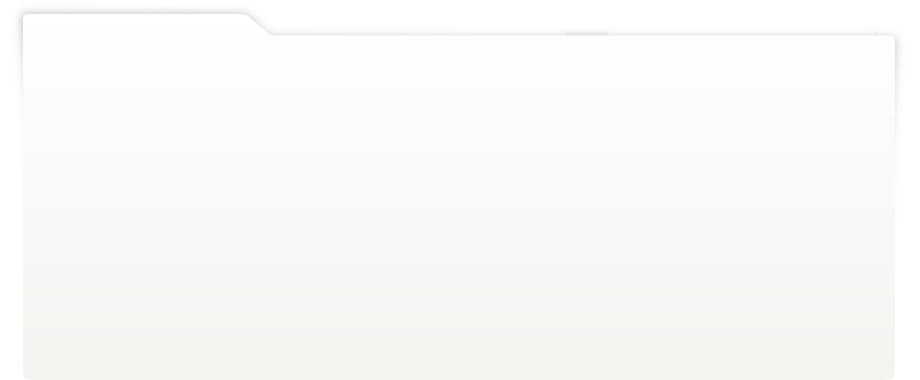
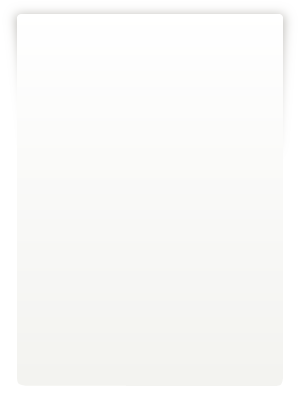
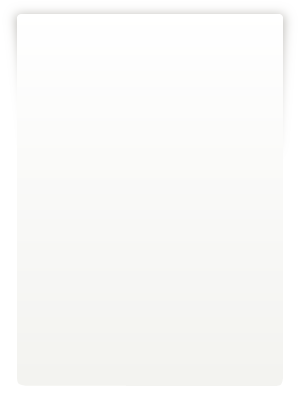
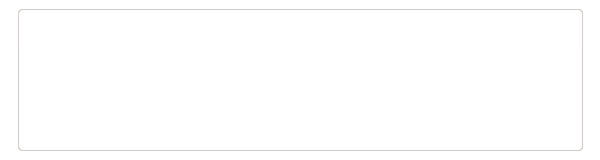
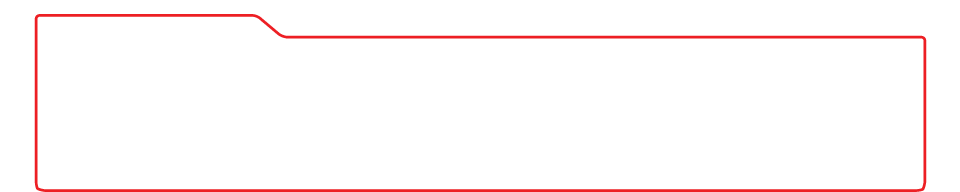
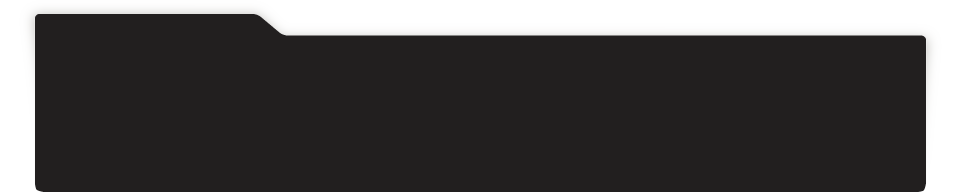
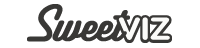
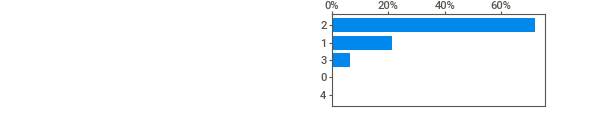
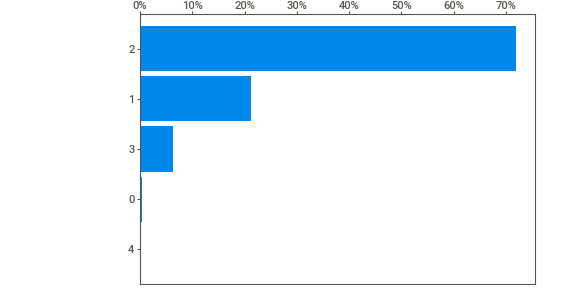
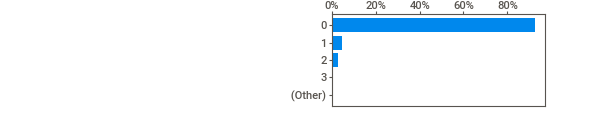
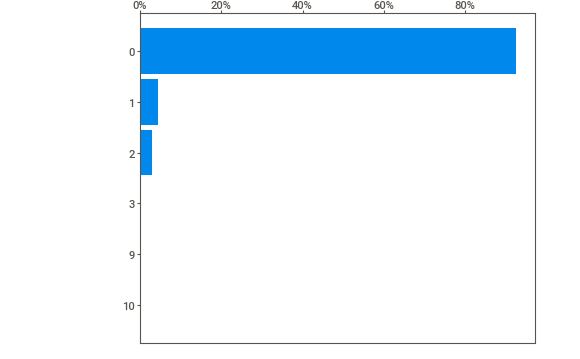
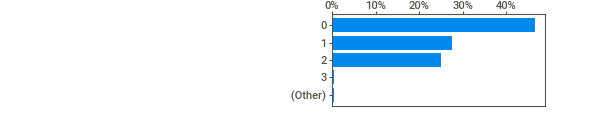
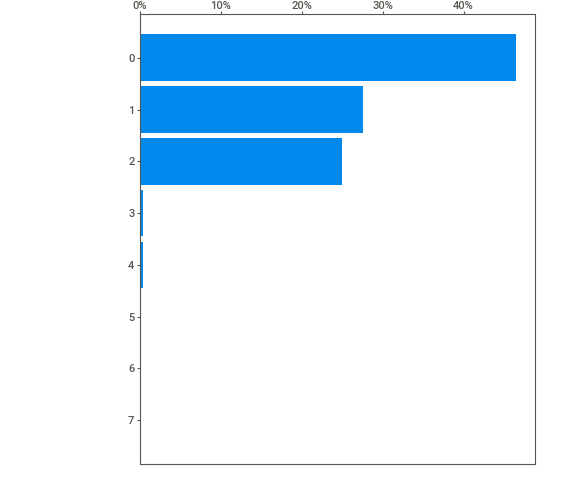
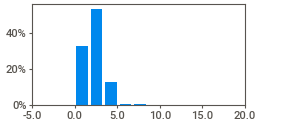
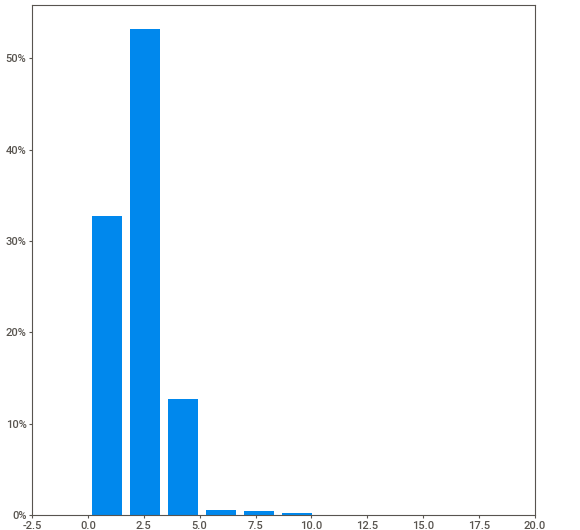
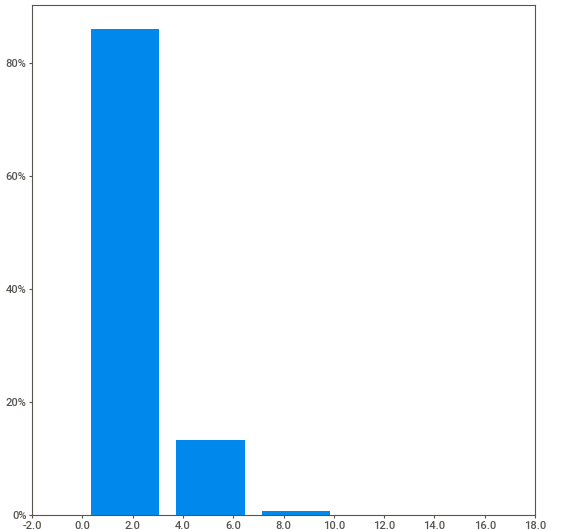
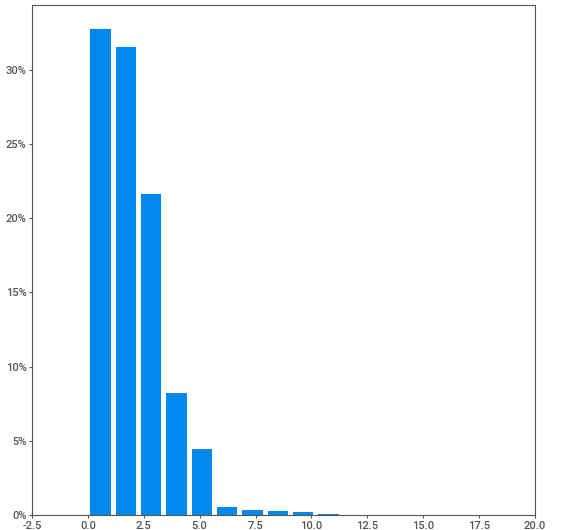
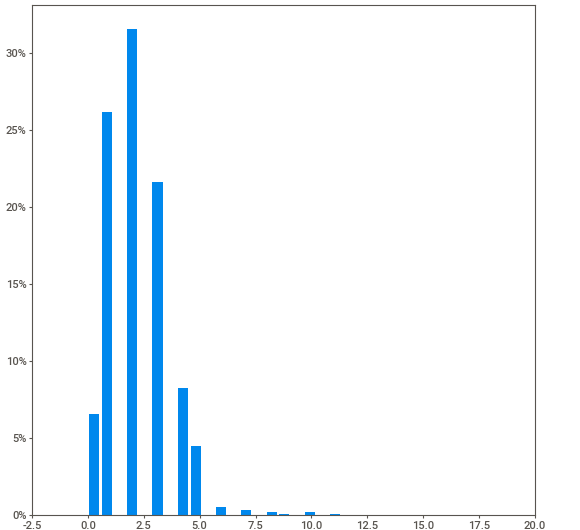
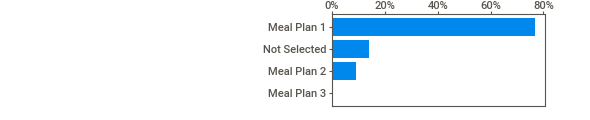
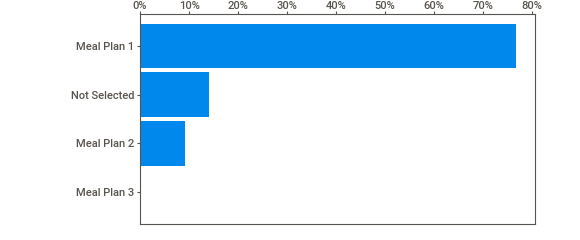
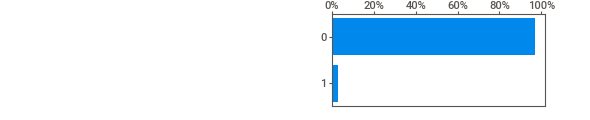
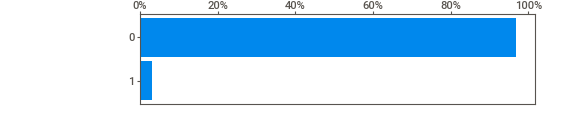
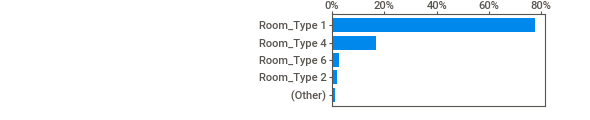
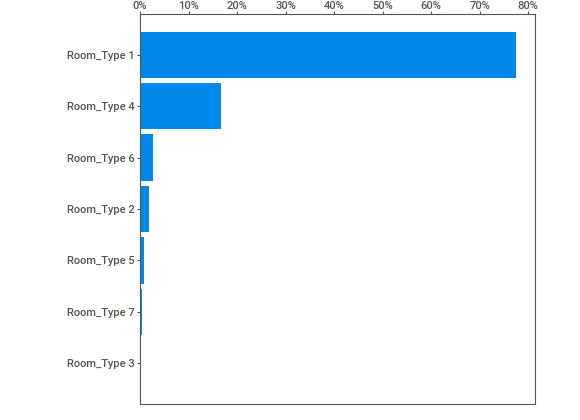
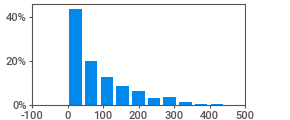
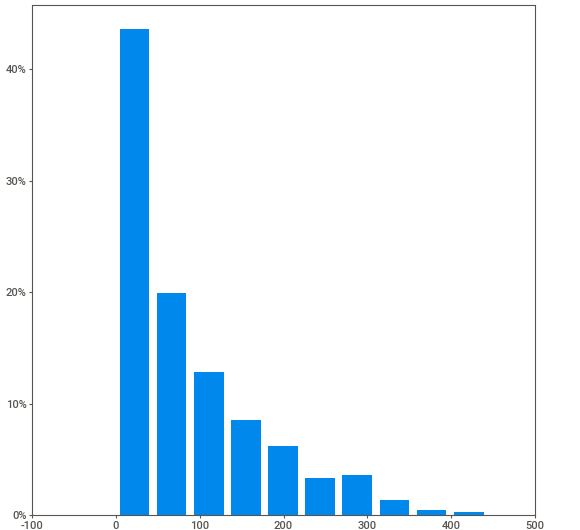
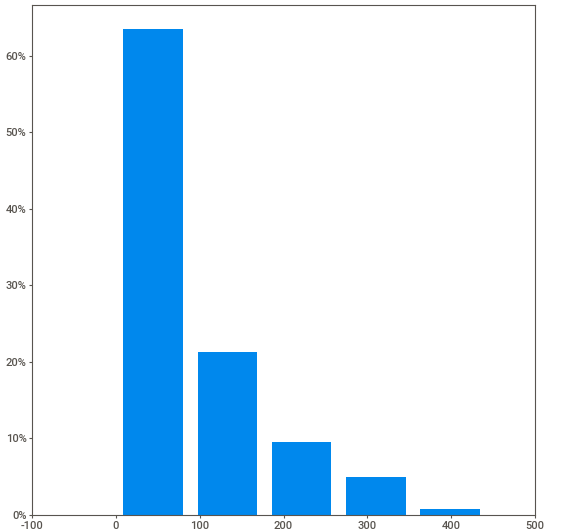
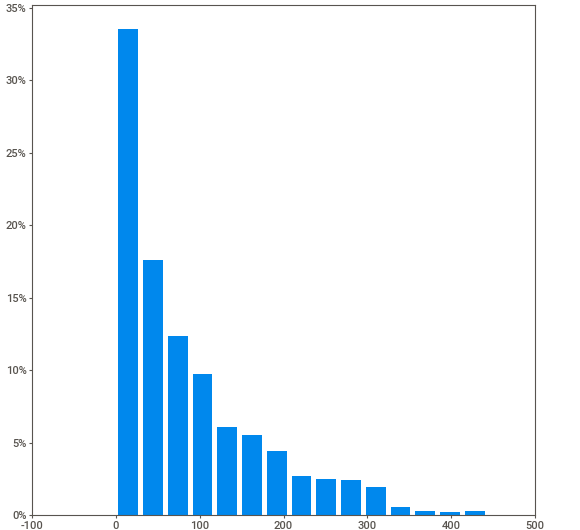
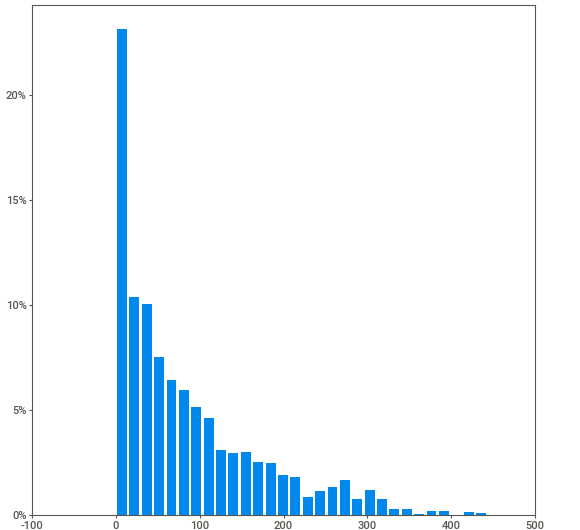
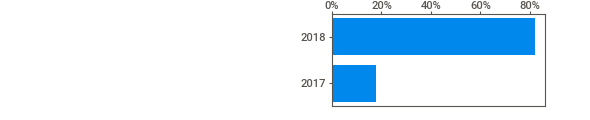
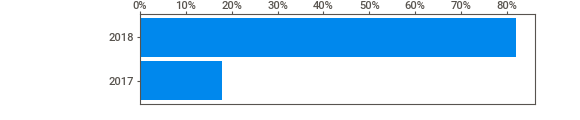
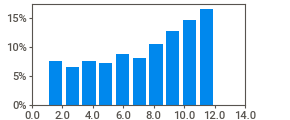
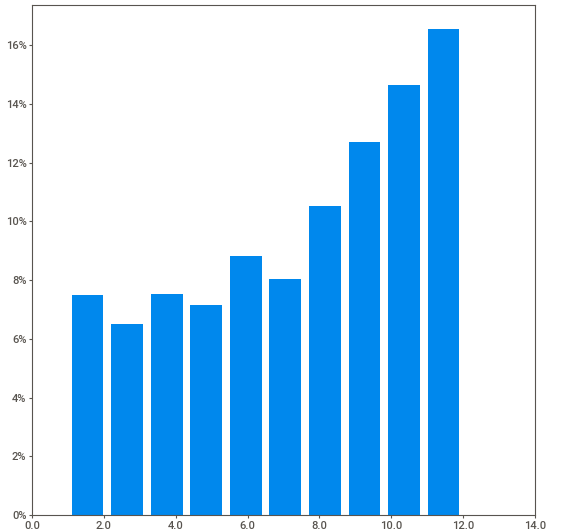
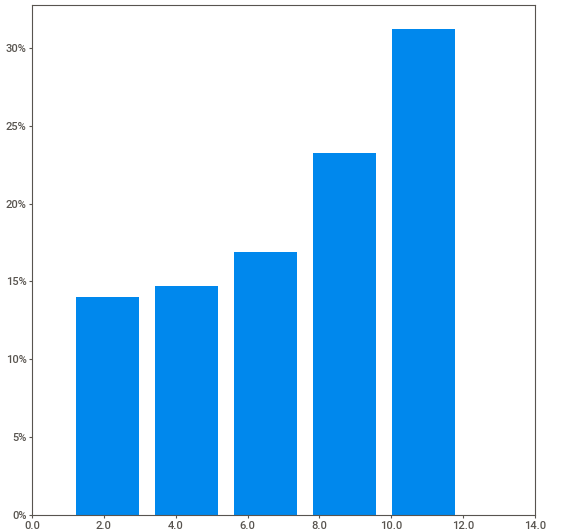
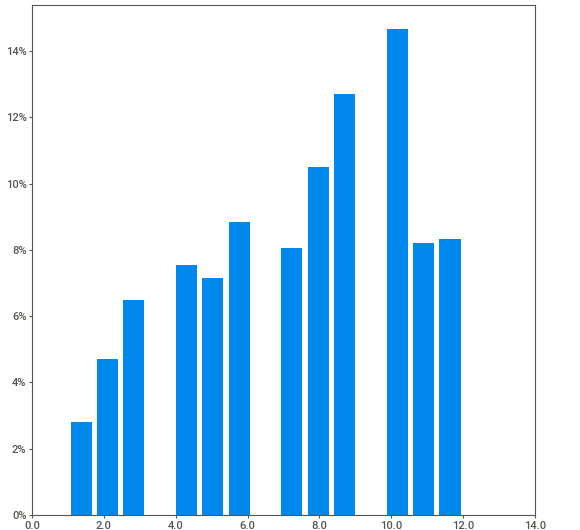
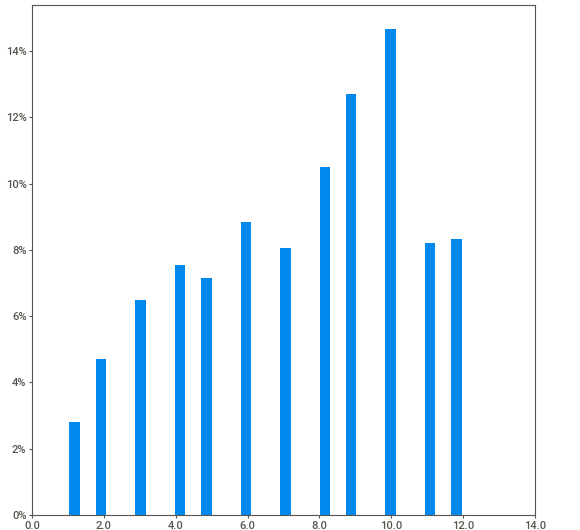
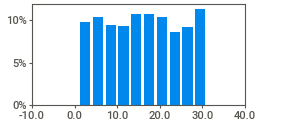
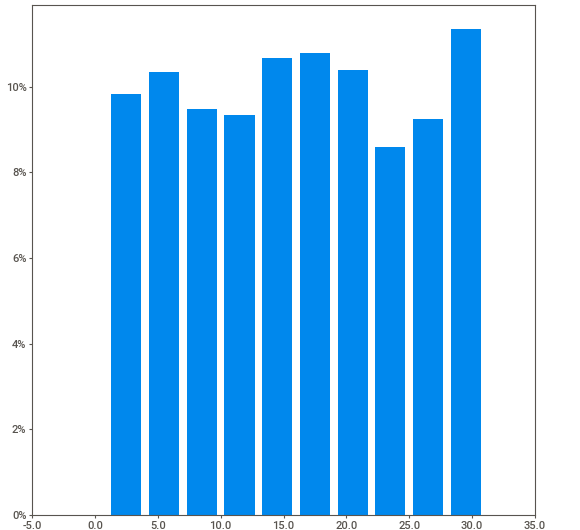
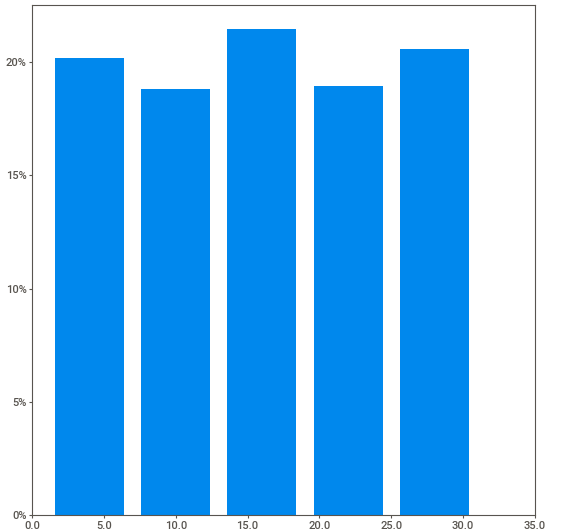
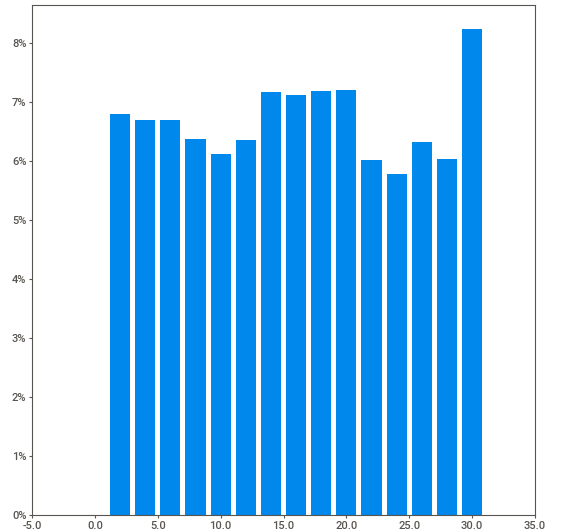
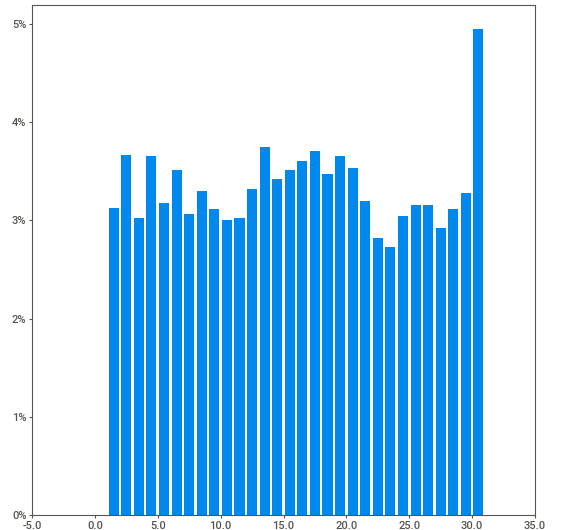
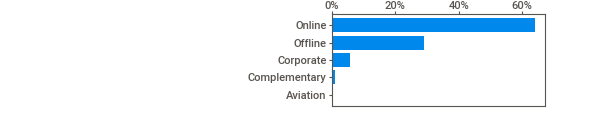
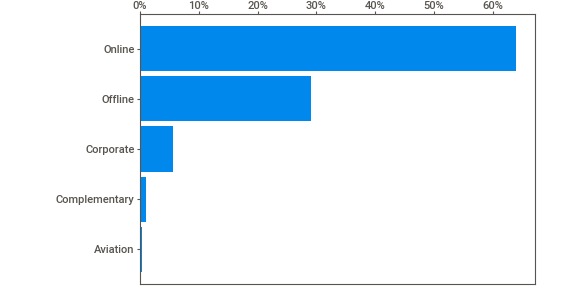
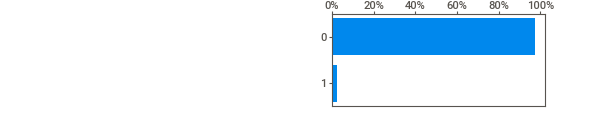
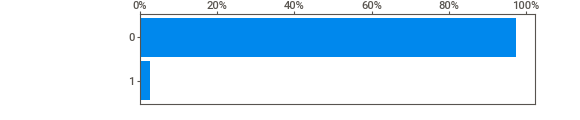
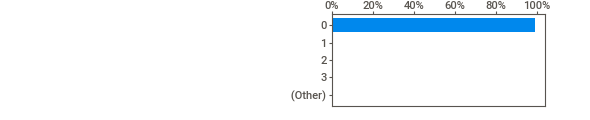
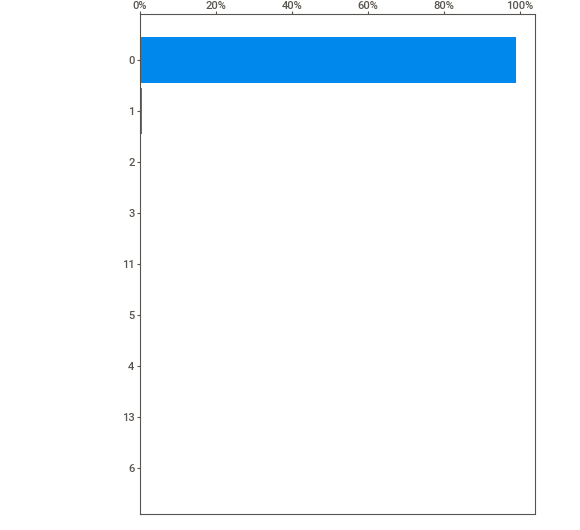
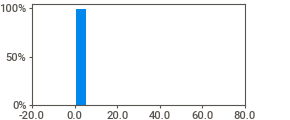
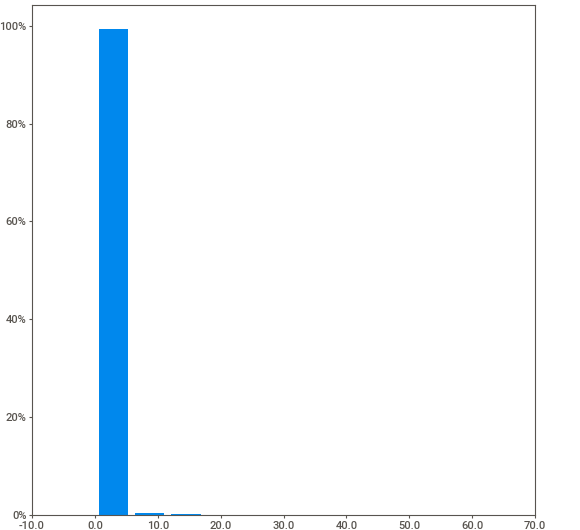
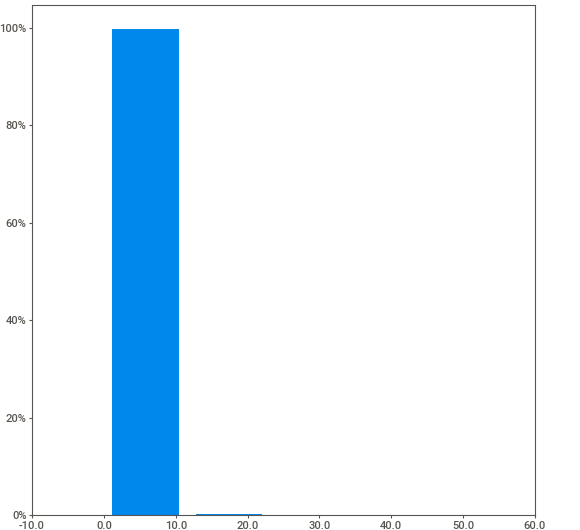
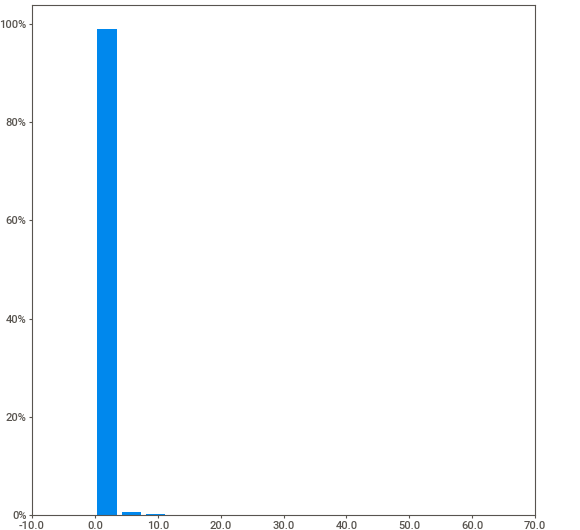
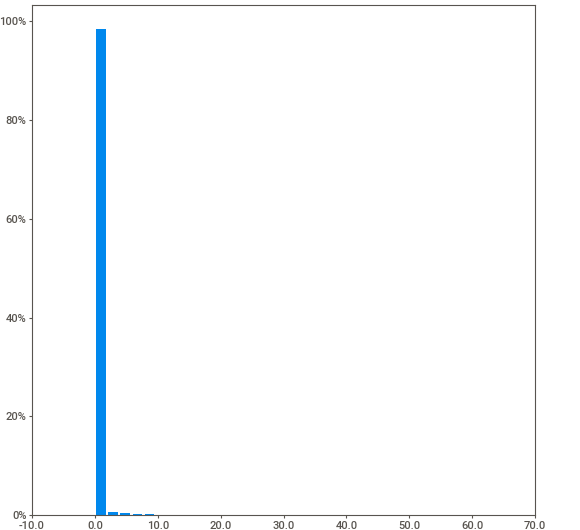
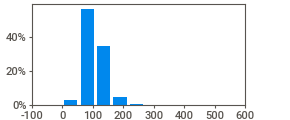
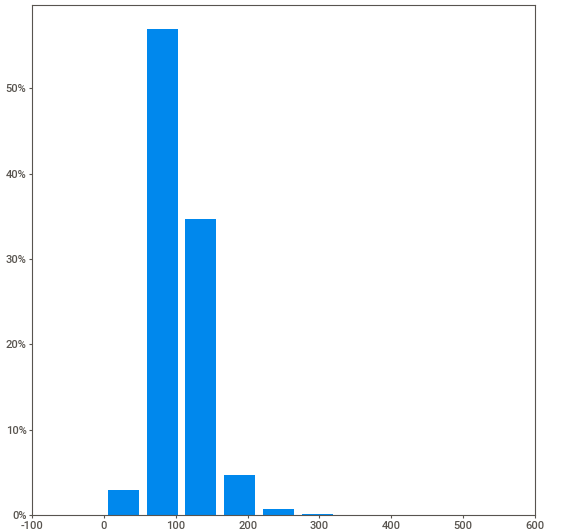
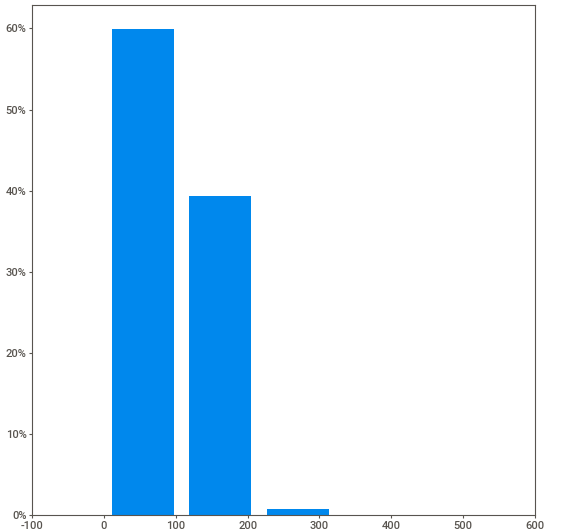
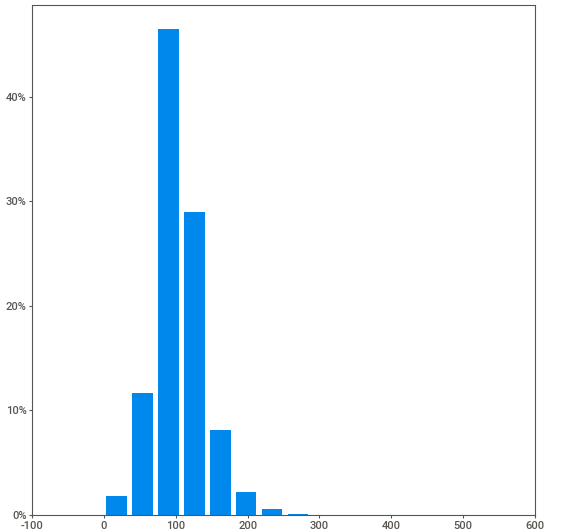
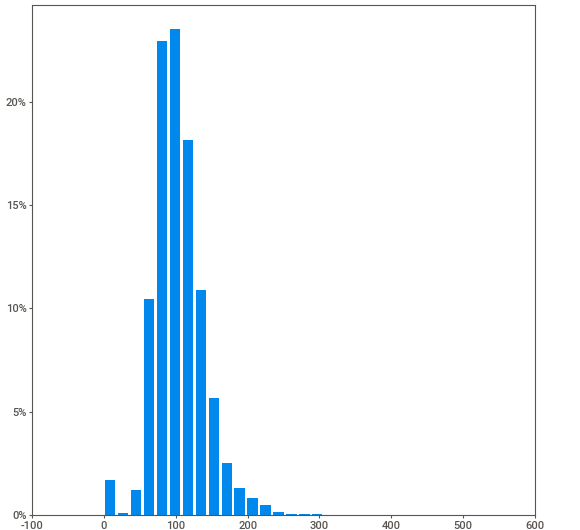
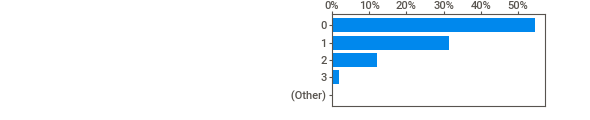
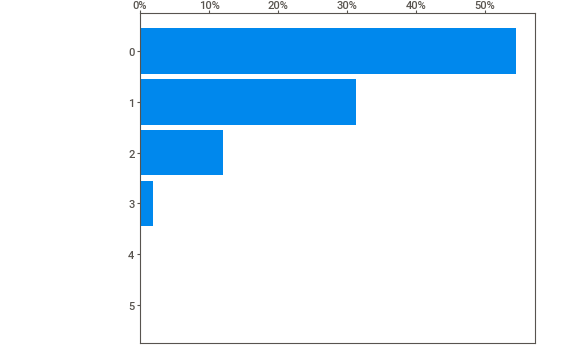
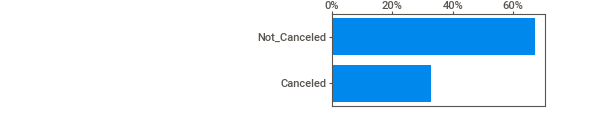
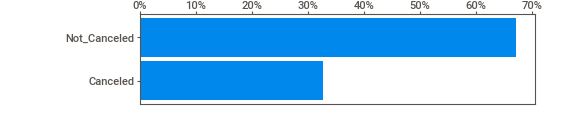
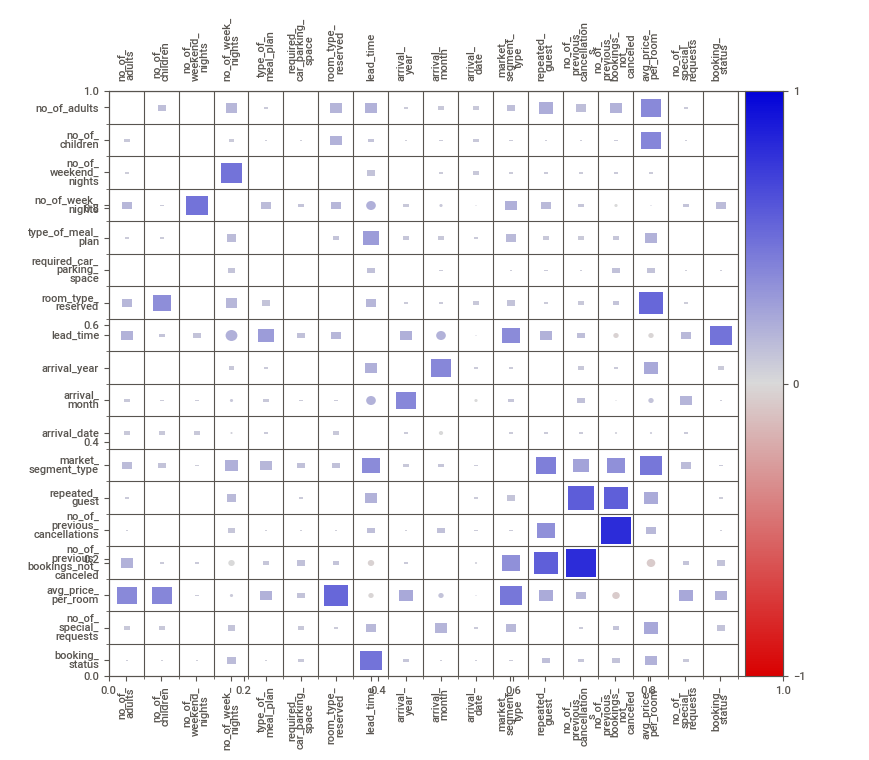
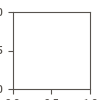

In [10]:
report = sv.analyze(data)
report.show_notebook()

### Definir por lo menos un corte en el dataset para realizar la interpretación de los resultados, justificar la elección de la variable de corte y explicar detalladamente los resultados encontrados.


                                             |          | [  0%]   00:00 -> (? left)


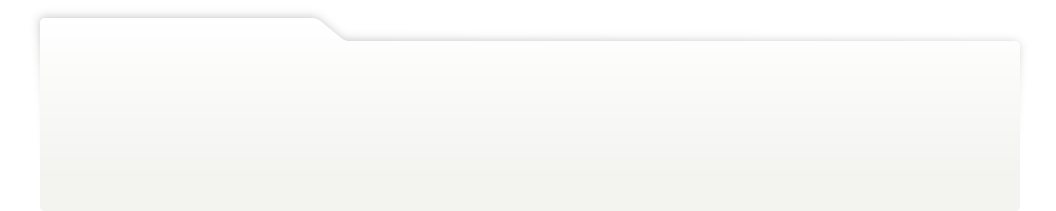
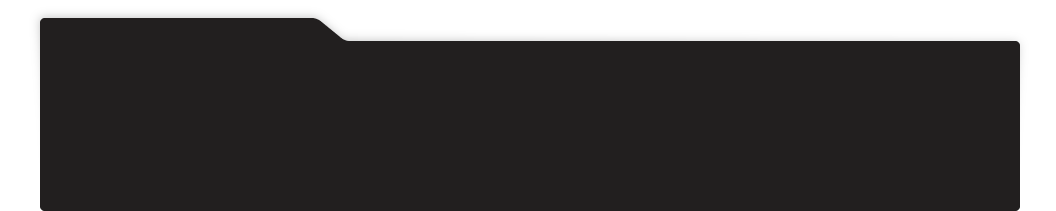
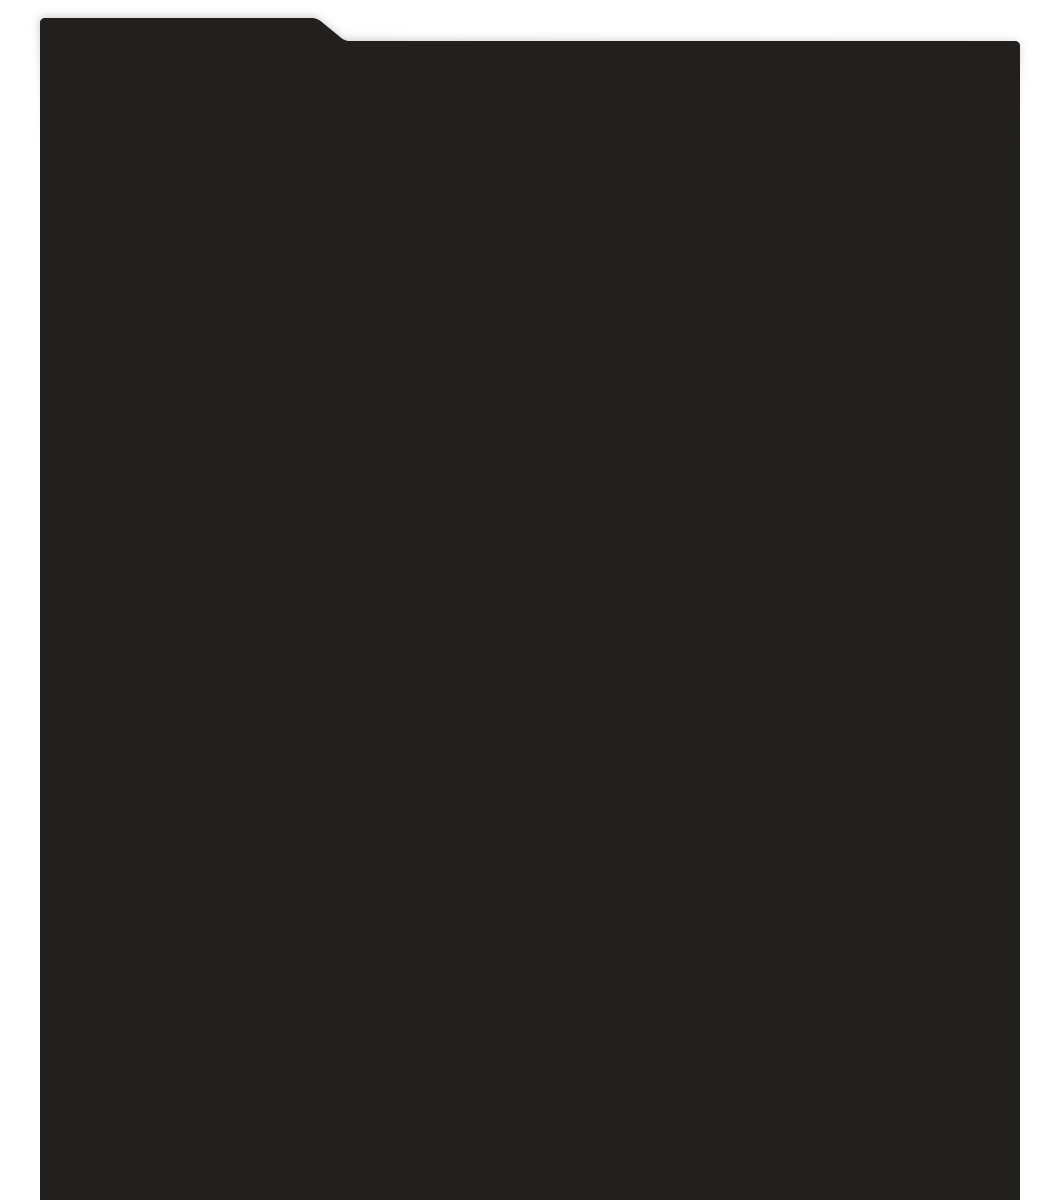
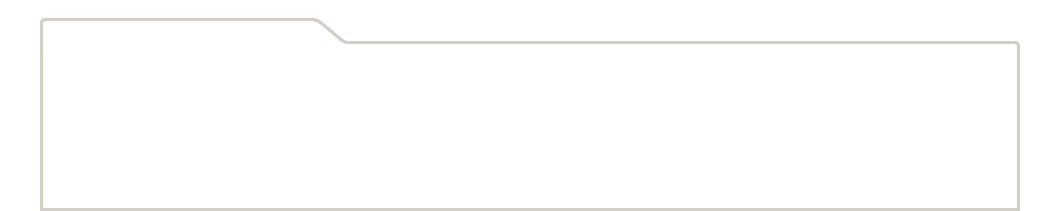
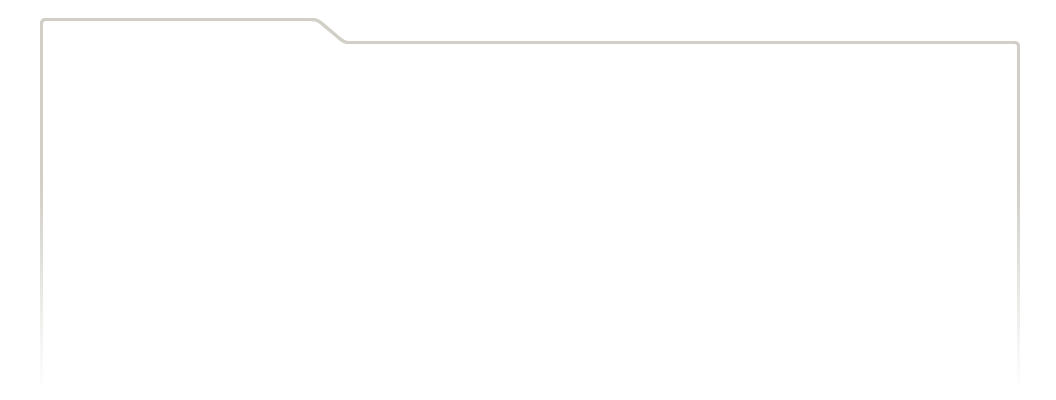
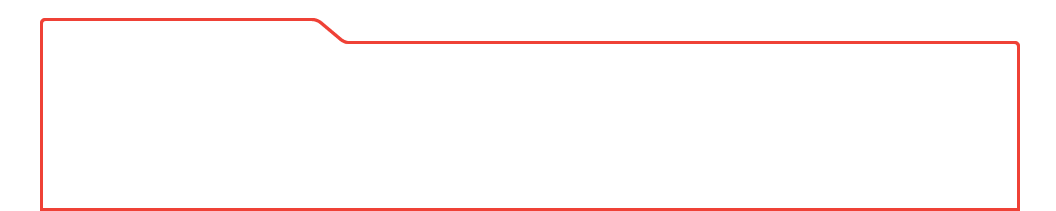
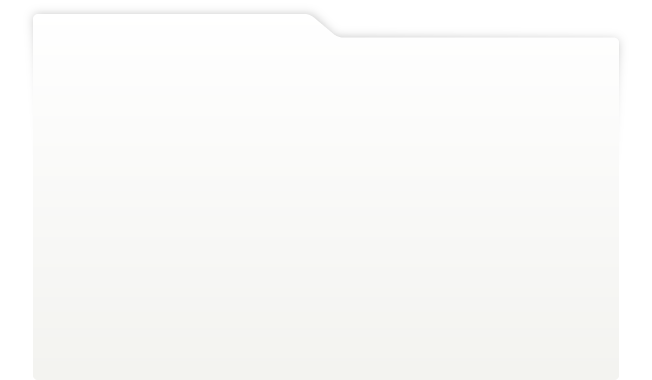
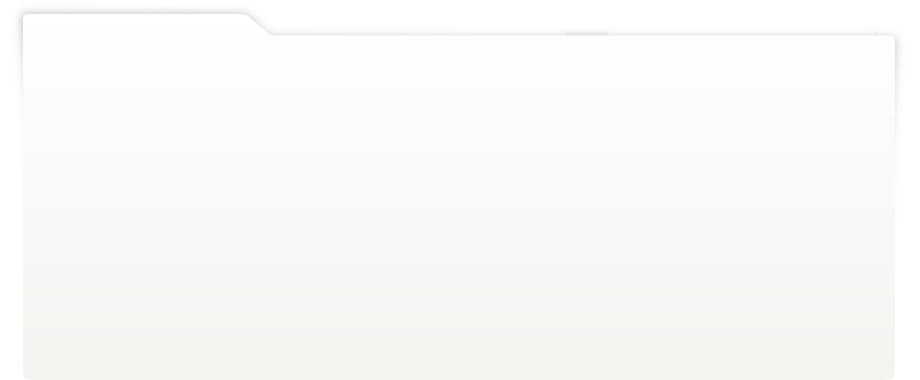
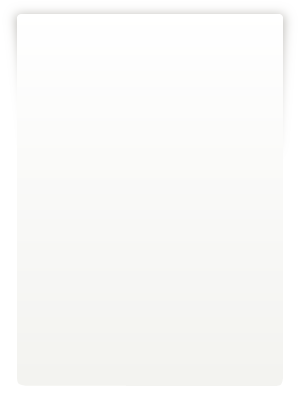
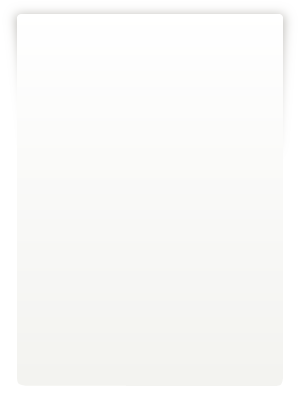
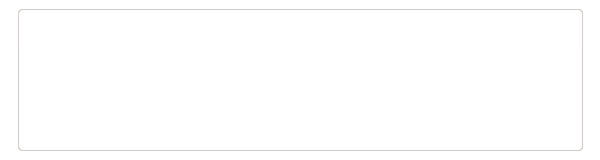
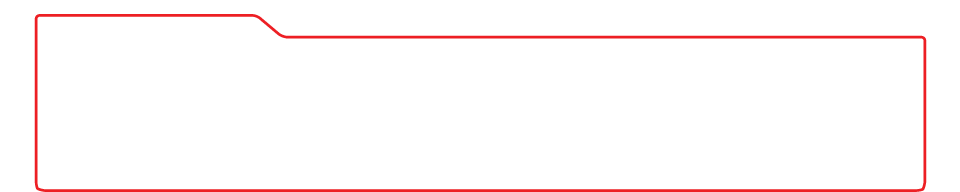
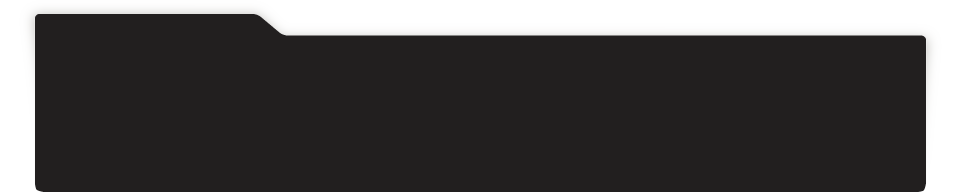
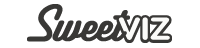
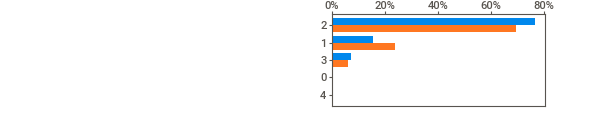
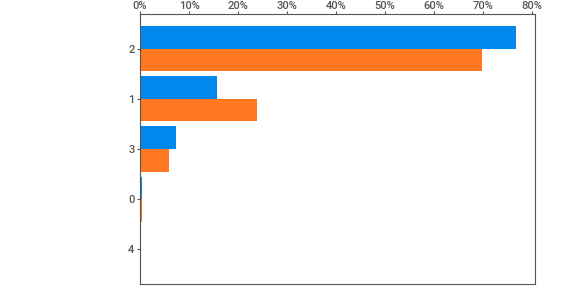
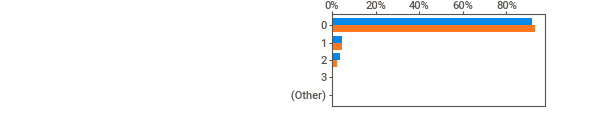
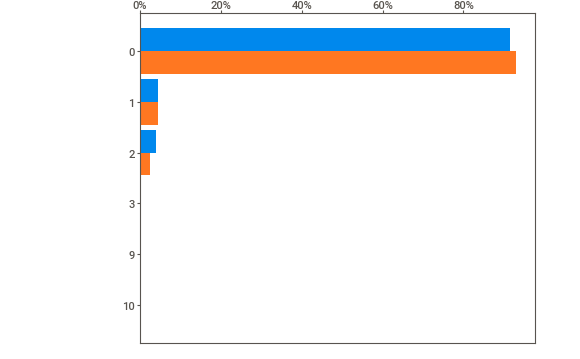
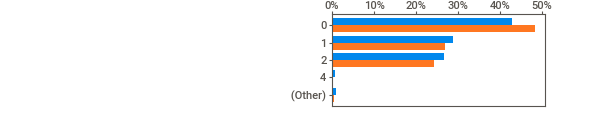
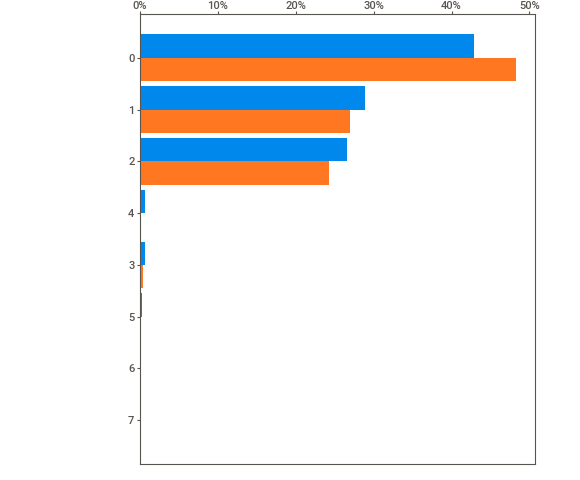
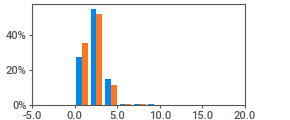
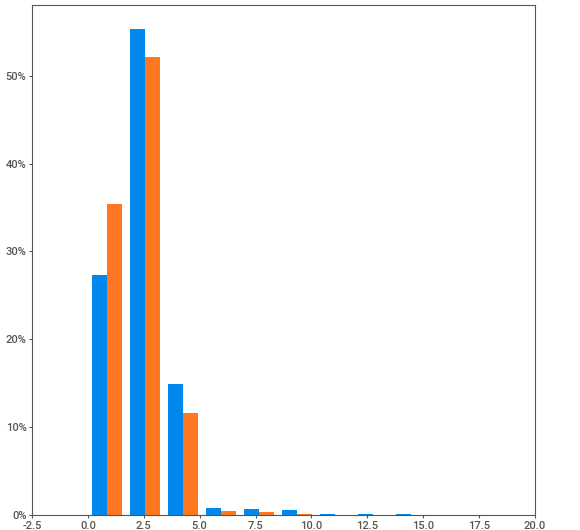
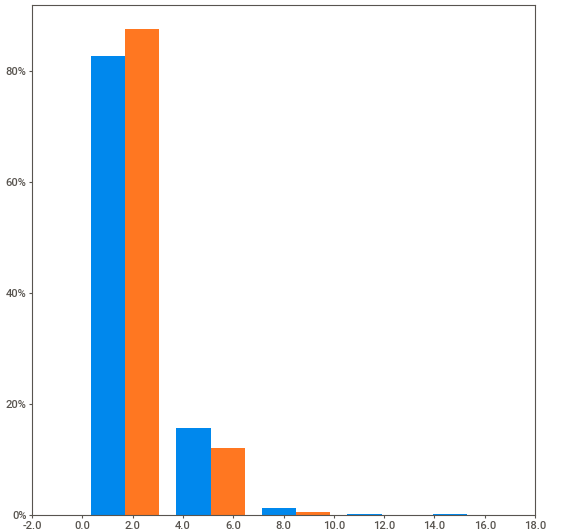
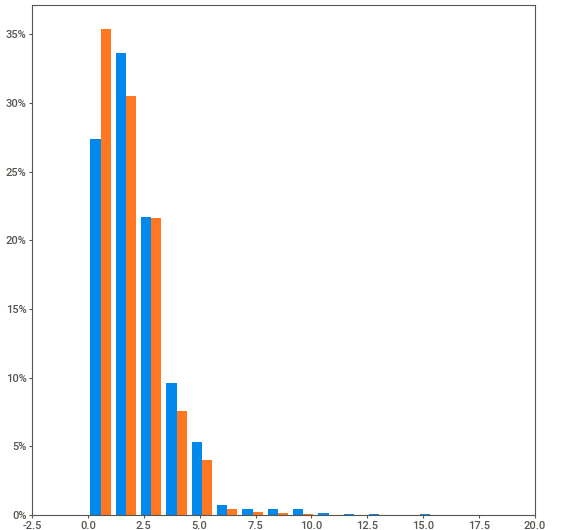
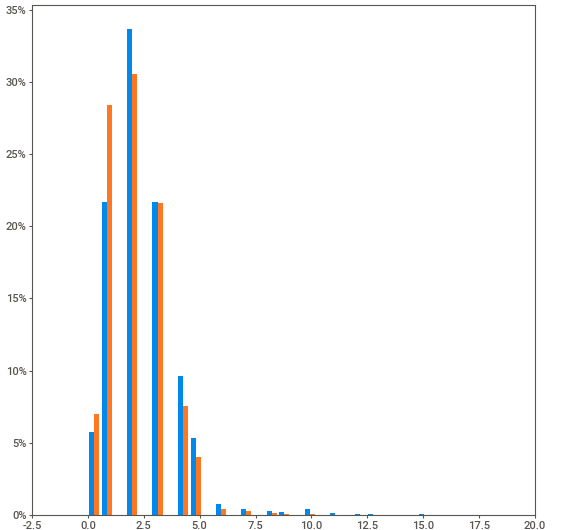
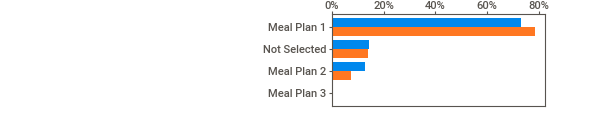
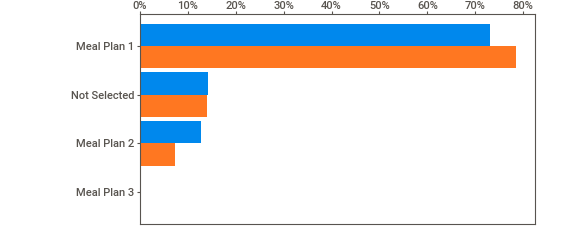
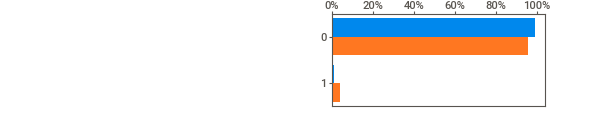
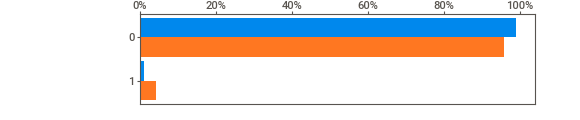
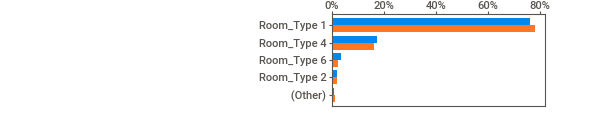
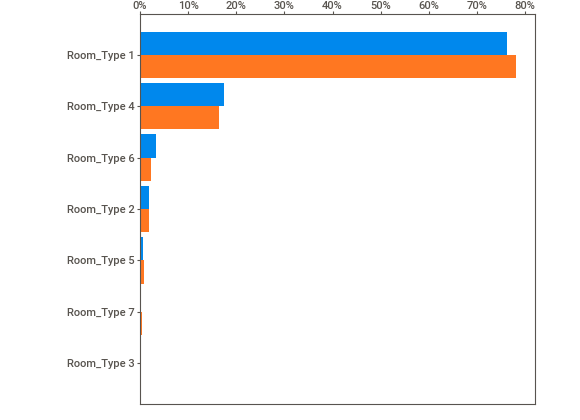
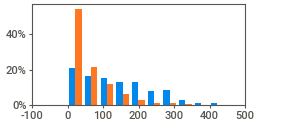
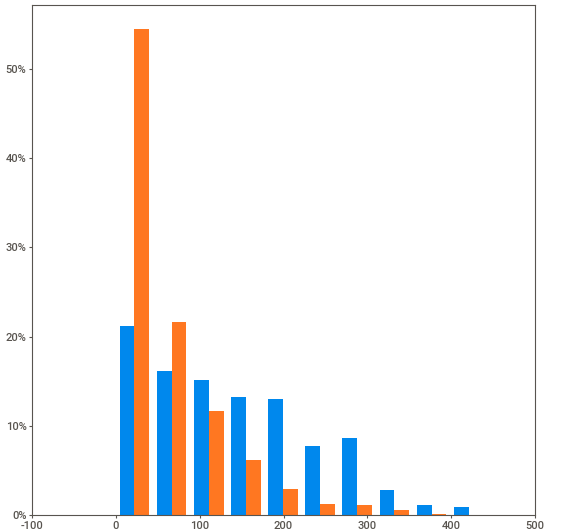
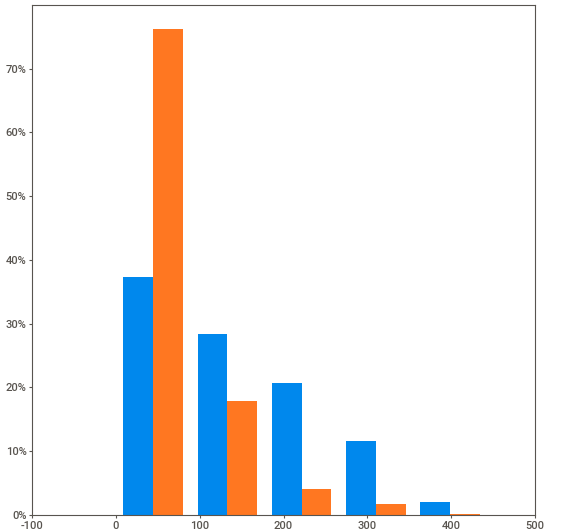
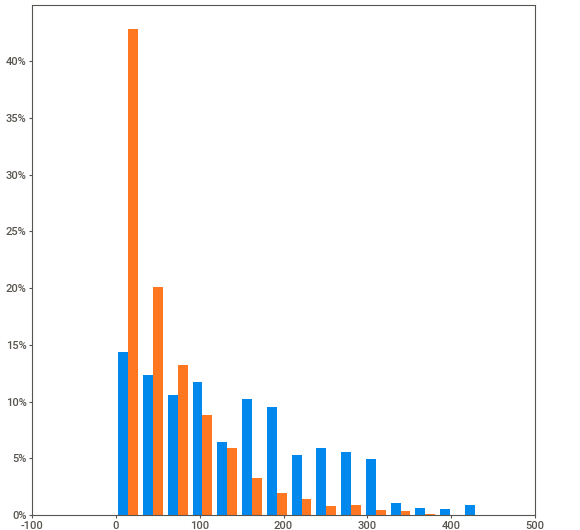
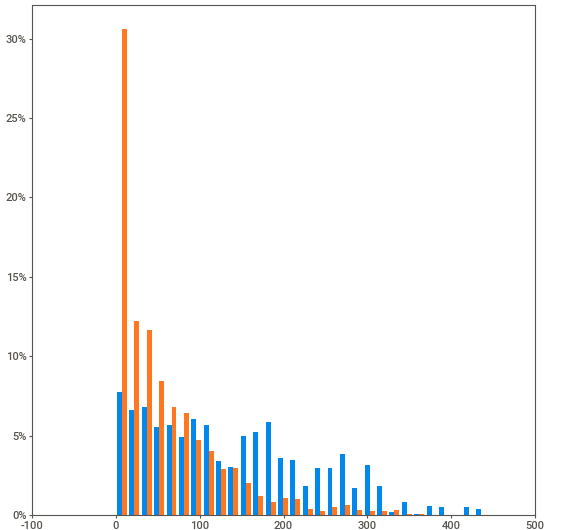
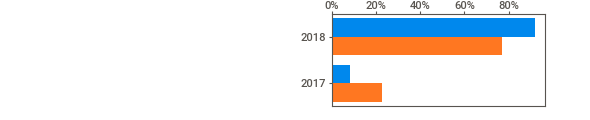
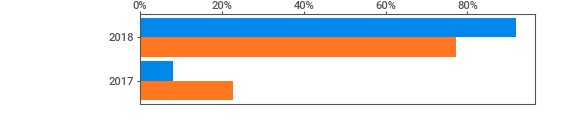
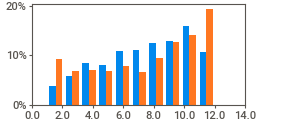
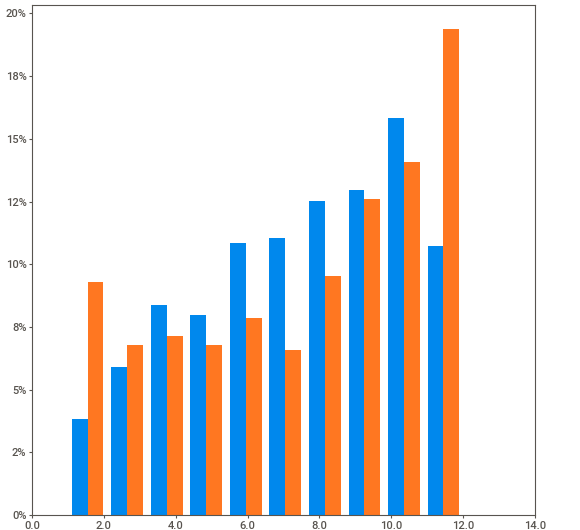
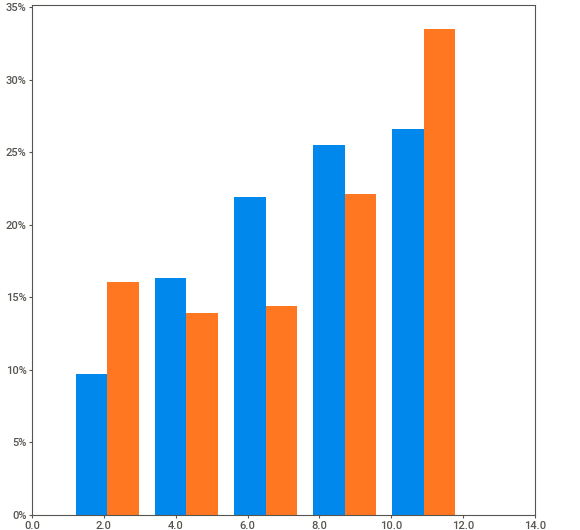
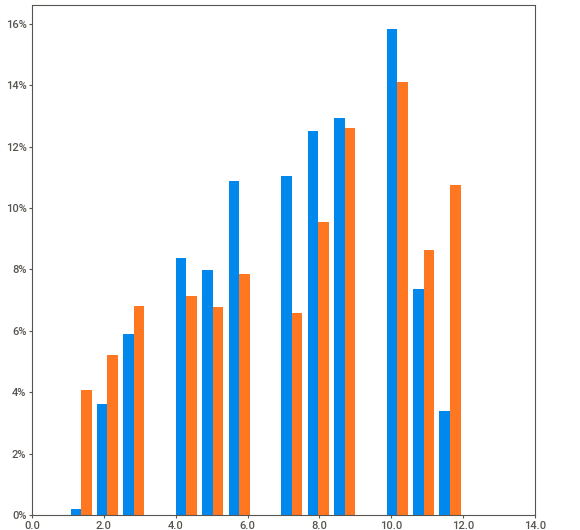
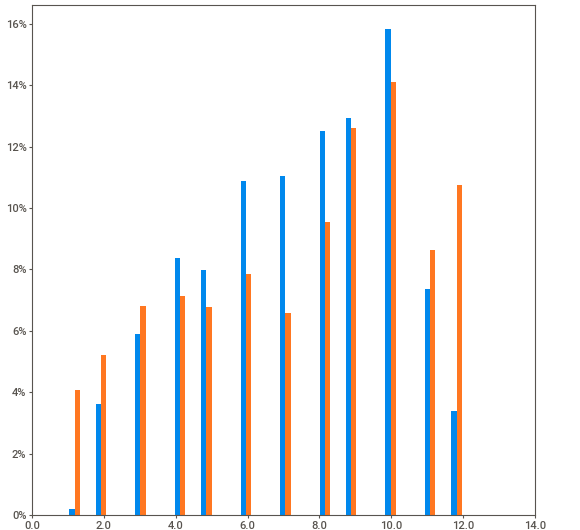
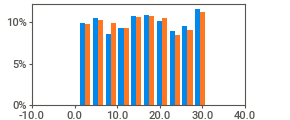
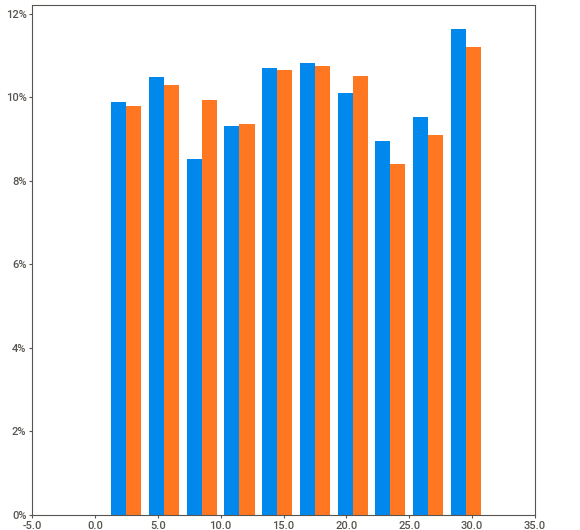
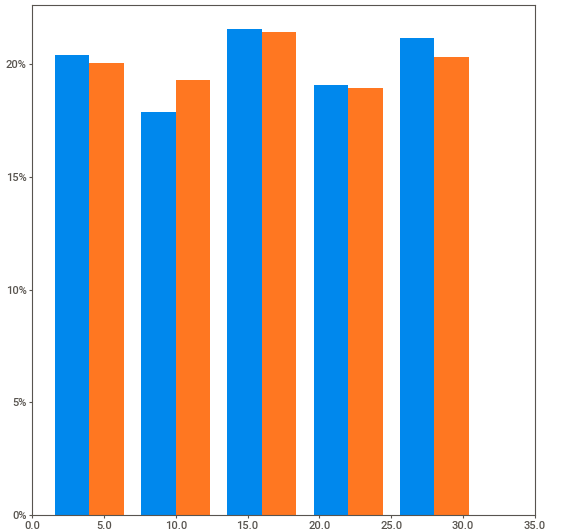
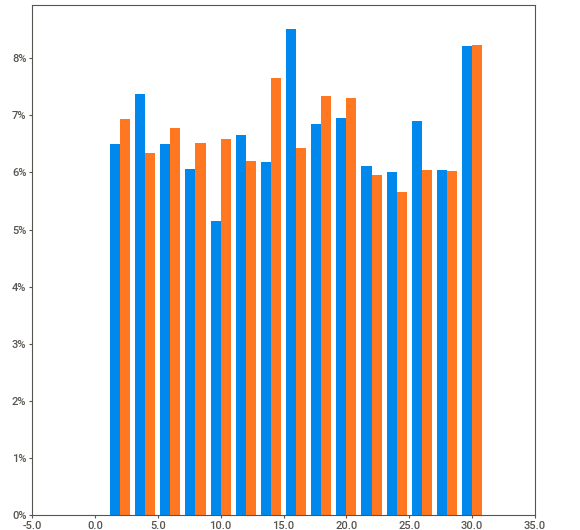
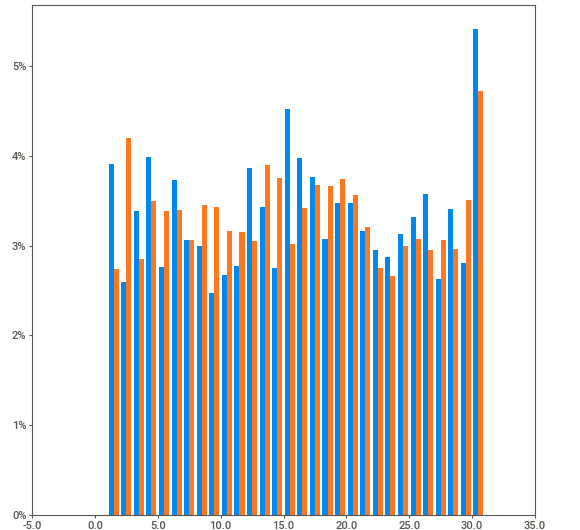
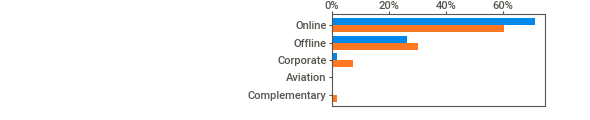
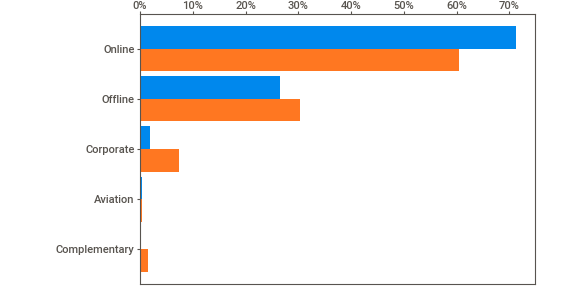
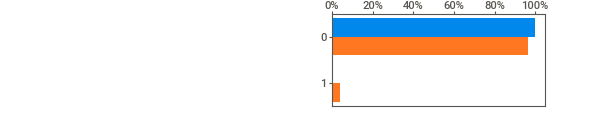
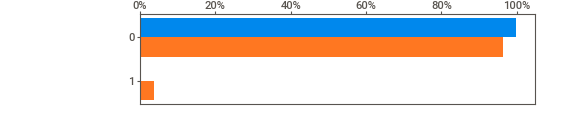
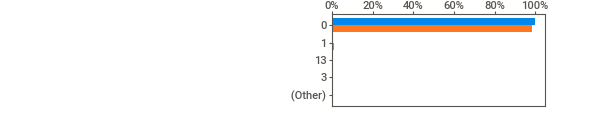
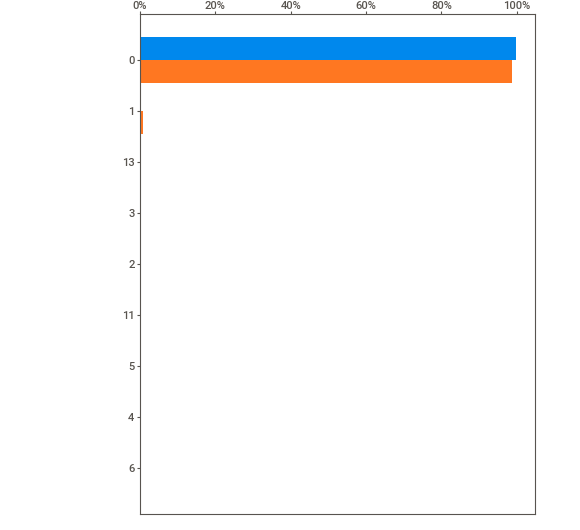
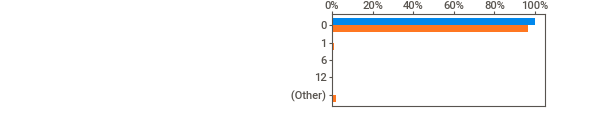
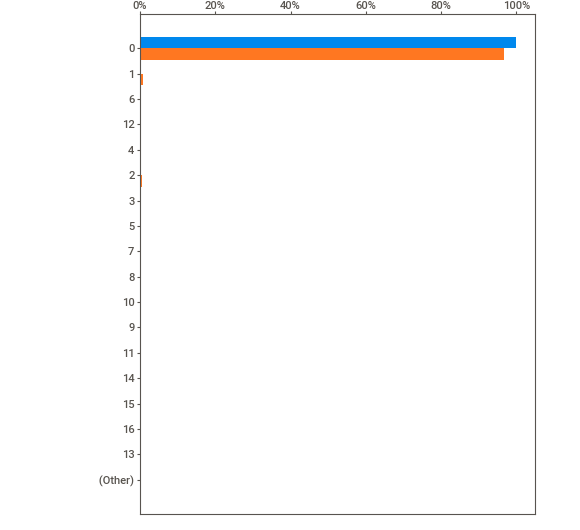
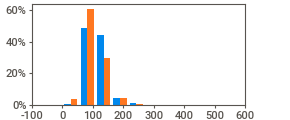
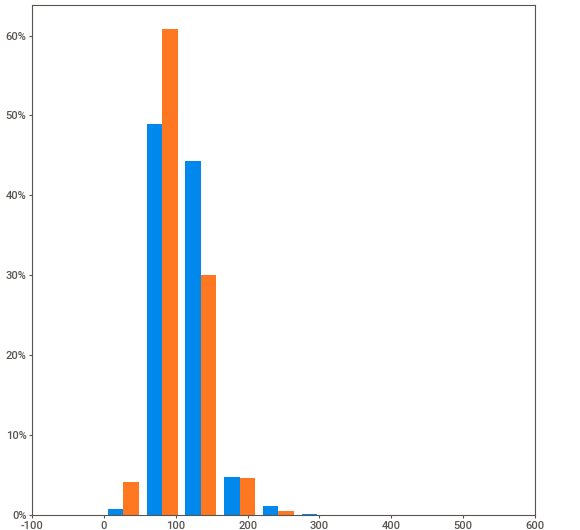
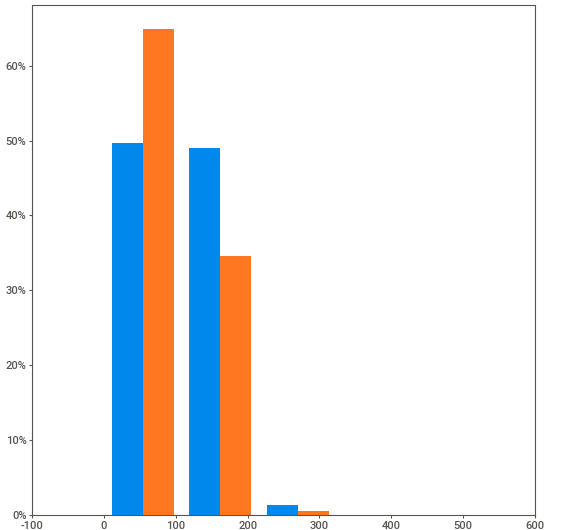
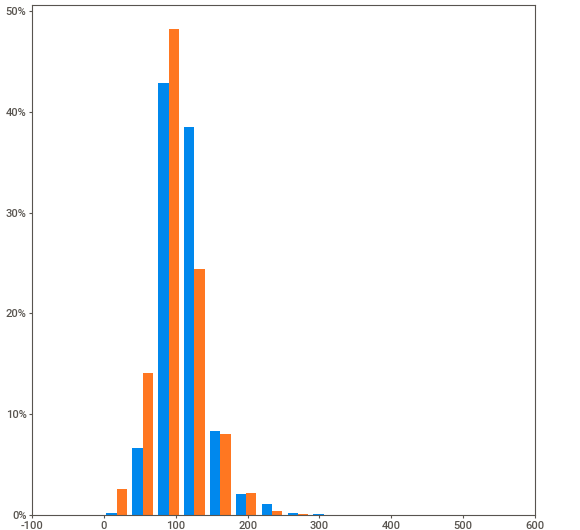
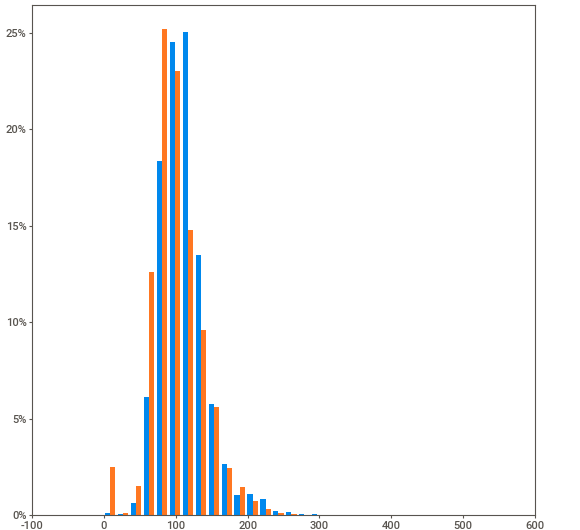
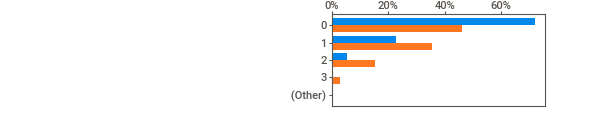
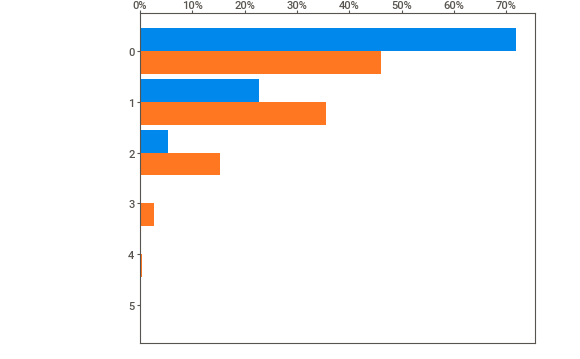
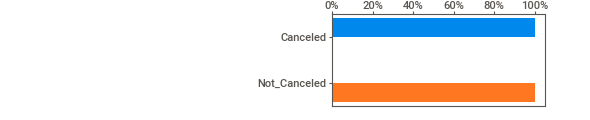
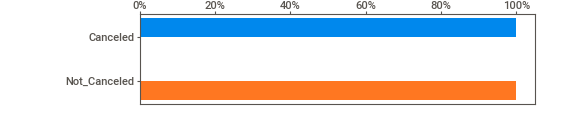
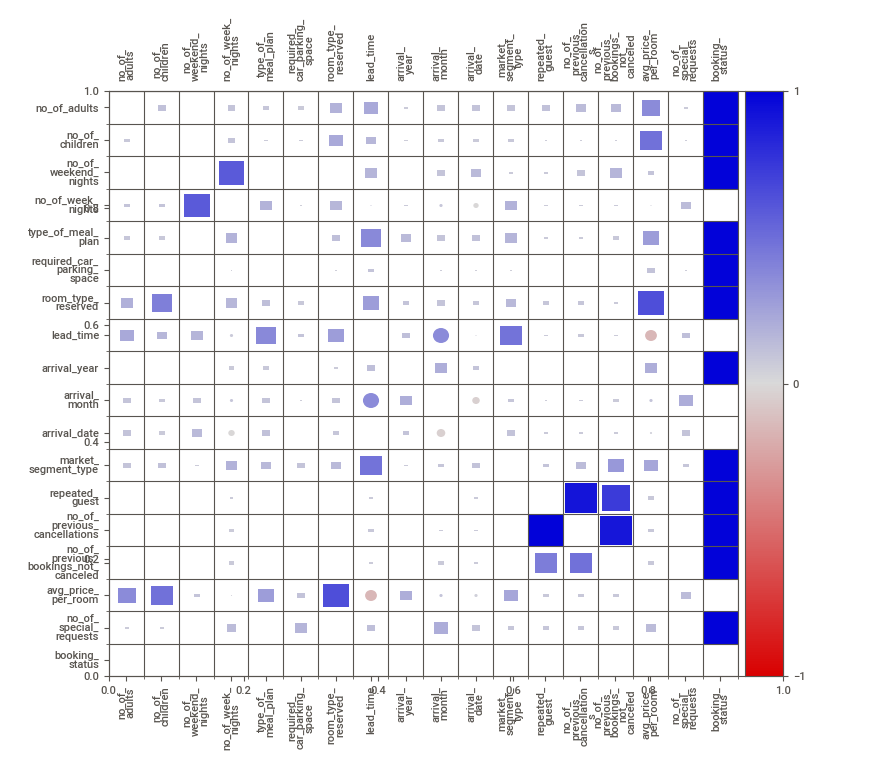
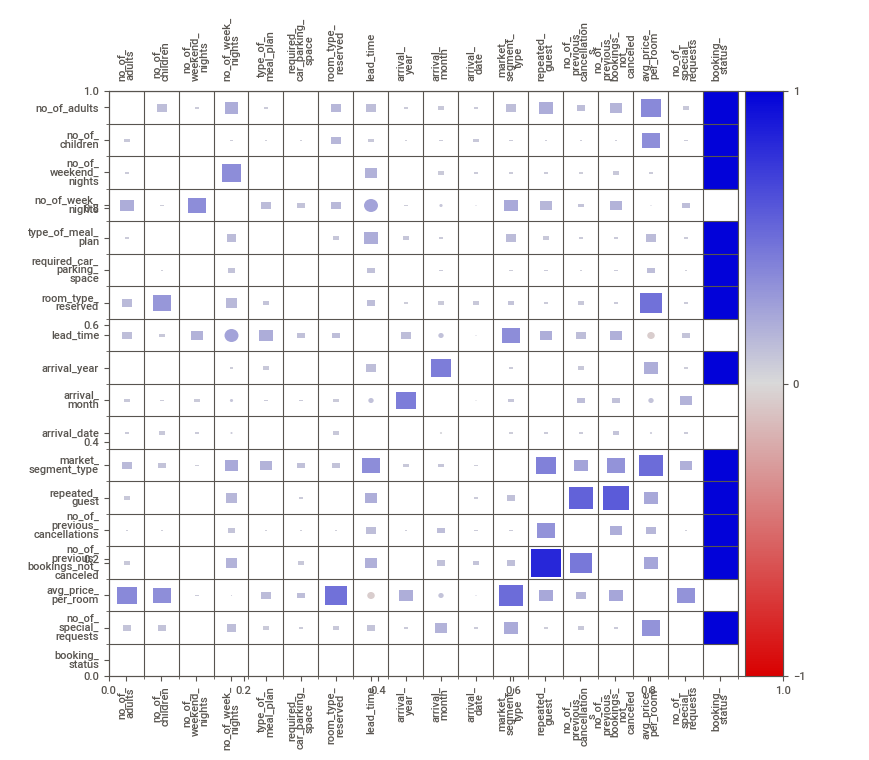

In [11]:
import pandas as pd
import sweetviz as sv

# Dividir el dataset en función de la variable "booking_status" (reservas canceladas y no canceladas)
canceled_reservations = data[data['booking_status'] == 'Canceled']
not_canceled_reservations = data[data['booking_status'] == 'Not_Canceled']
report = sv.compare([canceled_reservations, "Reservas Canceladas"], [not_canceled_reservations, "Reservas No Canceladas"])
report.show_notebook()

###  Realizar la extracción de características, extraer por lo menos una característica manual, y dos características automáticas, justificar y documentar.


# Manuales

Proporción de noches de fin de semana respecto al total de noches

 * Esto nos dará una idea de la preferencia de los clientes por las estancias de fin de semana, lo que podría estar relacionado con cancelaciones o no cancelaciones, dado que los fines de semana suelen ser más propensos a viajes cortos y posiblemente más susceptibles de cancelación.

In [12]:
# Crear una nueva columna para la proporción de noches de fin de semana respecto al total de noches
data['weekend_night_ratio'] = data['no_of_weekend_nights'] / (data['no_of_weekend_nights'] + data['no_of_week_nights'])

# Reemplazar valores NaN con 0 en caso de divisiones por 0
data['weekend_night_ratio'].fillna(0, inplace=True)

# Visualizar los primeros valores de la nueva característica
data[['no_of_weekend_nights', 'no_of_week_nights', 'weekend_night_ratio']].head()


,no_of_weekend_nights,no_of_week_nights,weekend_night_ratio
0,1,2,0.333333
1,2,3,0.400000
2,2,1,0.666667
3,0,2,0.000000
4,1,1,0.500000


 Duración de la estadía (total_nights)

* El número total de noches de una reserva puede ser un indicador clave. Los clientes que se hospedan por períodos más largos podrían tener un comportamiento diferente en comparación con aquellos que reservan estancias cortas, como la probabilidad de cancelación.

In [13]:
# Calcular el número total de noches (entre semana y fines de semana)
data['total_nights'] = data['no_of_weekend_nights'] + data['no_of_week_nights']

# Visualizar los primeros valores
data[['no_of_weekend_nights', 'no_of_week_nights', 'total_nights']].head()


,no_of_weekend_nights,no_of_week_nights,total_nights
0,1,2,3
1,2,3,5
2,2,1,3
3,0,2,2
4,1,1,2


# Automaticas

Costo total de la estadía (Total Cost)

* El costo total de la estadía podría influir en la decisión de cancelar una reserva. Las reservas más costosas pueden tener una tasa de cancelación diferente comparada con las más económicas.

In [14]:
# Calcular el costo total de la estadía
data['total_cost'] = data['avg_price_per_room'] * data['total_nights']

# Visualizar los primeros valores
data[['avg_price_per_room', 'total_nights', 'total_cost']].head()

,avg_price_per_room,total_nights,total_cost
0,65.00,3,195.0
1,106.68,5,533.4
2,60.00,3,180.0
3,100.00,2,200.0
4,94.50,2,189.0


 Relación entre tiempo de antelación y noches reservadas

* Esta característica ayuda a identificar si la reserva se realizó con mucha antelación para una estancia corta o larga. 

In [15]:
# Calcular la relación entre el tiempo de antelación y el número total de noches
data['lead_time_to_nights_ratio'] = data['lead_time'] / (data['total_nights'] + 1)

# Visualizar los primeros valores
data[['lead_time', 'total_nights', 'lead_time_to_nights_ratio']].head()


,lead_time,total_nights,lead_time_to_nights_ratio
0,224,3,56.000000
1,5,5,0.833333
2,1,3,0.250000
3,211,2,70.333333
4,48,2,16.000000


Precio promedio por noche los fines de semana

* Si un cliente se aloja durante el fin de semana, el precio promedio por noche en estos días puede influir en su comportamiento, ya que los fines de semana suelen tener tarifas más altas.

In [16]:
# Calcular el precio promedio por noche en fines de semana (si se hospedó en fin de semana)
data['avg_price_per_weekend_night'] = data['avg_price_per_room'] * data['no_of_weekend_nights'] / data['total_nights']

# Reemplazar NaN con 0 (para casos sin noches de fin de semana)
data['avg_price_per_weekend_night'].fillna(0, inplace=True)

# Visualizar los primeros valores
data[['avg_price_per_room', 'no_of_weekend_nights','total_nights', 'avg_price_per_weekend_night']].head()


,avg_price_per_room,no_of_weekend_nights,total_nights,avg_price_per_weekend_night
0,65.00,1,3,21.666667
1,106.68,2,5,42.672000
2,60.00,2,3,40.000000
3,100.00,0,2,0.000000
4,94.50,1,2,47.250000


In [25]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,weekend_night_ratio,total_nights,total_cost,lead_time_to_nights_ratio,avg_price_per_weekend_night
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,0,65.00,0,Not_Canceled,0.333333,3,195.0,56.000000,21.666667
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,0,106.68,1,Not_Canceled,0.400000,5,533.4,0.833333,42.672000
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,0,60.00,0,Canceled,0.666667,3,180.0,0.250000,40.000000
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,0,100.00,0,Canceled,0.000000,2,200.0,70.333333,0.000000
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,0,94.50,0,Canceled,0.500000,2,189.0,16.000000,47.250000


### Usar pipelines de sklearn para realizar la conversión de variables categóricas (nominales y ordinales) a numéricas y realizar el escalado correspondiente, justificar el tipo de escalado escogido.


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [19]:
# Variables categóricas y numéricas
categorical_columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
numerical_columns = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 
                     'lead_time', 'avg_price_per_room', 'no_of_special_requests', 'weekend_night_ratio', 'total_nights', 'total_cost',	'lead_time_to_nights_ratio', 'avg_price_per_weekend_night']

In [20]:
# Separar características y la variable objetivo
X = data.drop(columns=['booking_status'])  # Características 
y = data['booking_status']  # Variable objetivo

In [21]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Definir el transformador para variables categóricas (OneHotEncoder)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Manejar valores faltantes
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # Codificación One-Hot
])

# Definir el transformador para variables numéricas (StandardScaler)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),           # Imputar valores faltantes
    ('scaler', StandardScaler())                           # Escalado de las características
])

# Crear el preprocesador (ColumnTransformer) que aplica las transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),   # Aplicar transformación a numéricas
        ('cat', categorical_transformer, categorical_columns) # Aplicar transformación a categóricas
    ])

# Crear un pipeline completo que incluye el preprocesador y un modelo de clasificación
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))  # Usamos un clasificador simple
])

# Entrenar el modelo
model_pipeline.fit(X_train, y_train)

# Evaluar el modelo
score = model_pipeline.score(X_test, y_test)
print(f"Accuracy del modelo en el conjunto de prueba: {score:.2f}")


Accuracy del modelo en el conjunto de prueba: 0.89


### Selección de características usando Random Forest

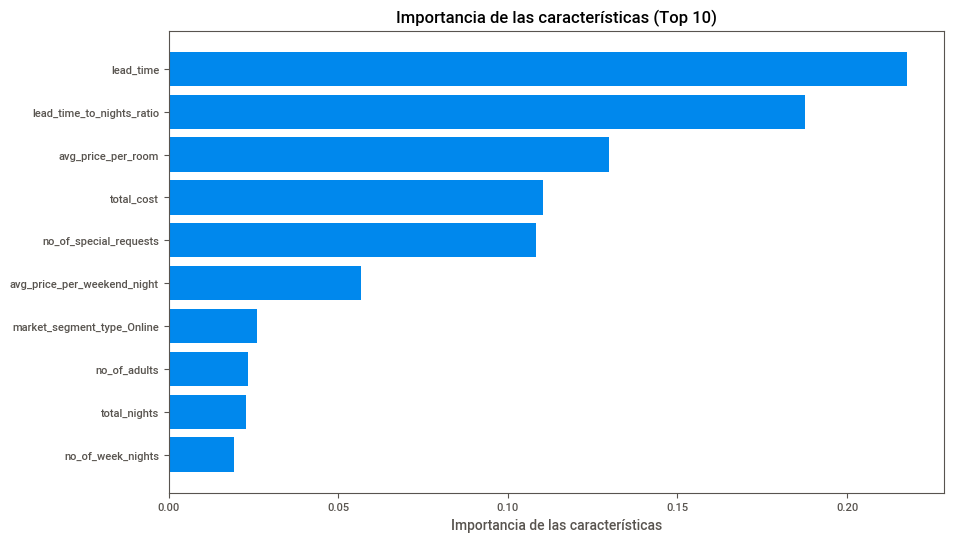

In [23]:
# Definir transformadores para variables categóricas y numéricas
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocesador (ColumnTransformer)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Crear un pipeline que incluye el preprocesador y el clasificador Random Forest
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Entrenar el modelo
model_pipeline.fit(X_train, y_train)

# Obtener la importancia de las características
importances = model_pipeline.named_steps['classifier'].feature_importances_

# Obtener los nombres de las columnas después de OneHotEncoding
encoded_columns = model_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_columns)
all_columns = np.concatenate([numerical_columns, encoded_columns])

# Ordenar las características según su importancia
sorted_idx = np.argsort(importances)[::-1]
sorted_columns = all_columns[sorted_idx]
sorted_importances = importances[sorted_idx]

# Mostrar las características más importantes
plt.figure(figsize=(10, 6))
plt.barh(sorted_columns[:10], sorted_importances[:10])
plt.xlabel('Importancia de las características')
plt.title('Importancia de las características (Top 10)')
plt.gca().invert_yaxis()
plt.show()


* Este método es efectivo porque las características se seleccionan en base a su impacto directo en el rendimiento del modelo.
* Nos ayuda a eliminar características irrelevantes o poco importantes que no agregan valor a la predicción.

### Reducción de características usando PCA (Análisis de Componentes Principales)

Cantidad Total de componentes: 23
Cantidad de componentes reducidas con PCA: 10


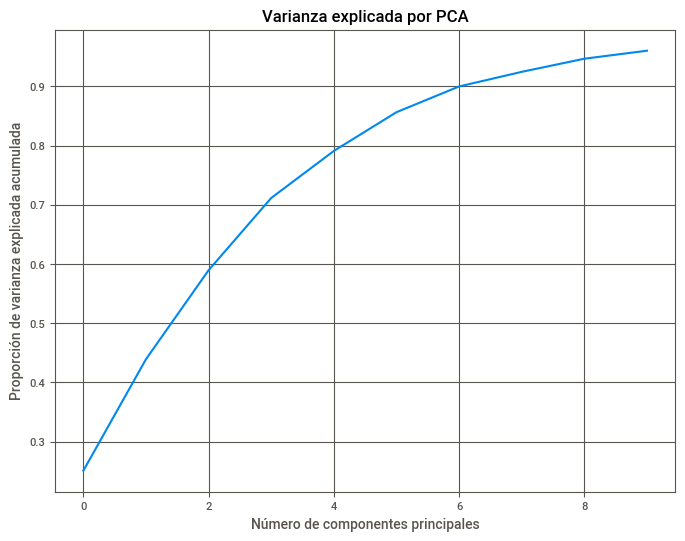

In [24]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Crear un pipeline que incluye el preprocesador y PCA
pca_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95))  # Mantener 95% de la varianza
])

# Ajustar PCA con los datos de entrenamiento
pca_pipeline.fit(X_train)

# Transformar los datos
X_train_pca = pca_pipeline.transform(X_train)
X_test_pca = pca_pipeline.transform(X_test)

# Visualizar la cantidad de componentes principales seleccionadas
pca = pca_pipeline.named_steps['pca']
print(f"Cantidad Total de componentes: {X_train.shape[1]}")
print(f"Cantidad de componentes reducidas con PCA: {pca.n_components_}")

# Visualizar la proporción de varianza explicada por cada componente
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes principales')
plt.ylabel('Proporción de varianza explicada acumulada')
plt.title('Varianza explicada por PCA')
plt.grid(True)
plt.show()


* PCA es ideal para reducir la dimensionalidad y mejorar la velocidad de procesamiento sin perder demasiada información.
* Es útil cuando hay correlación entre variables y quieres simplificar el conjunto de datos.